In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('vgsales.csv')

In [5]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


<AxesSubplot:ylabel='Frequency'>

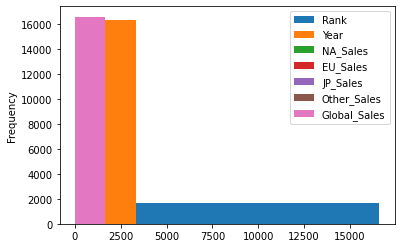

In [6]:
df.plot.hist(by='Year' == 2015)

In [7]:
Selection = df.loc[(df['Genre'] == 'Shooter') & (df['Publisher'] == 'Activision')]   #refining data to a subset for processing

In [8]:
Selection  # checking out subsets data is correct and clean

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
...,...,...,...,...,...,...,...,...,...,...,...
15605,15608,James Bond 007: Blood Stone,PC,2010.0,Shooter,Activision,0.02,0.00,0.00,0.00,0.02
15804,15807,Call of Duty: Modern Warfare Trilogy,X360,2016.0,Shooter,Activision,0.01,0.01,0.00,0.00,0.02
15895,15898,Enemy Territory: Quake Wars,PC,2007.0,Shooter,Activision,0.01,0.00,0.00,0.00,0.02
16334,16337,Greg Hastings' Tournament Paintball Max'd,PS2,2006.0,Shooter,Activision,0.01,0.00,0.00,0.00,0.01


In [9]:
processing = Selection.loc[df['Year'] == 2015]   # creation of a subset that will contain only entries from 2015

In [10]:
results = processing.filter(items= ['Global_Sales'])  # selecting global sales from subset

array([[<AxesSubplot:title={'center':'Global_Sales'}>]], dtype=object)

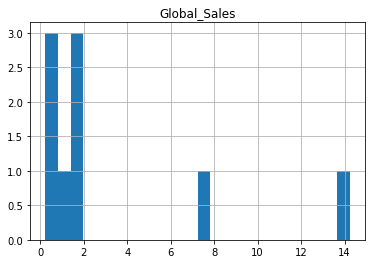

In [11]:
results.hist(bins = 24)  #printing to a basic graph

In [12]:
results.median()     # finding the median value of global sales for 2015 from all entries in subset

Global_Sales    1.76
dtype: float64

In [13]:
results.sum()       # adding up all global sales from within subset

Global_Sales    29.19
dtype: float64

In [27]:
Euro_Sales = processing.filter(items=['EU_Sales'])    # filtering subset for all European Sales and saving as another subset

In [29]:
Euro = Euro_Sales.sum()    # Using the new subset for european sales and creating a total sum and saving as an Array
Euro                       # checking the array for accuracy and data value

EU_Sales    10.86
dtype: float64

In [14]:
"""Here we're isolating Japanese Sales from our subset called processing"""
JP_Sales = processing.filter(items=['JP_Sales'])

In [30]:
"""Here we take our isolated subset and gather a sum for the entire variable called Japan_Sales"""
Japan = JP_Sales.sum()
Japan #Double Checking the sums datatype and value

JP_Sales    0.49
dtype: float64

In [31]:
"""Here we're isolating The Global Sales from our subset called processing"""
Global_Sales = processing.filter(items=['Global_Sales'])

In [32]:
"""Now we are going to get a total sum of all Global Sales in the isolated subset"""
Global = Global_Sales.sum()
Global #Double Checking the sums datatype and value

Global_Sales    29.19
dtype: float64

In [33]:
"""Here we use numpy library to create a 2D Array using Global & Japan Variables"""
x = np.array([[Global],[Japan],[Euro]])  #Specifying the x axis 2D Array
x = np.array(list(map(np.float64, x)))  # we have had to use the map function on our 2D array to bypass a type error value
x #Checking our X axis Values for Global Sales & Japan

array([29.19,  0.49, 10.86])

In [34]:
"""Defining the y Axis labels for our X axis values"""
y = ['Global','Japan','Europe']

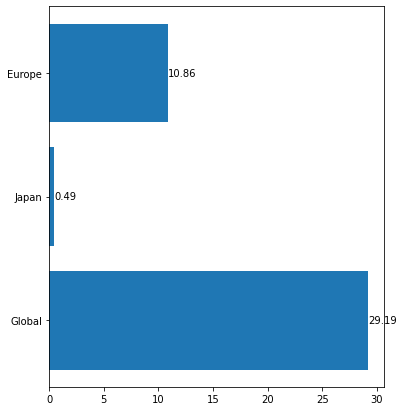

In [76]:
"""Generating & filling a graph with our X and Y values
To represent total sales of Shooter Games made by Activision in 2015"""
fig, ax = plt.subplots(figsize=(6, 7))
ax.barh(y, x)
ax.bar_label(ax.containers[0])

plt.show()

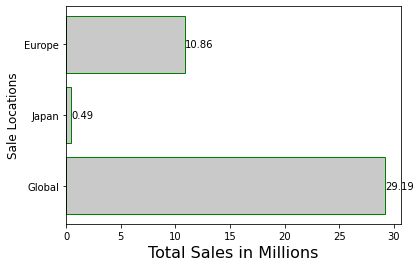

In [112]:
"""Creating a detailed plot to represent activisions sales for all shooter games in 2015 bar by continent sales"""
plt.bar_label(ax.containers[0])                     # Including float value for each column
plt.xlabel("Total Sales in Millions", fontsize=16)  # Plotting our X Axis Label
plt.ylabel("Sale Locations", fontsize=12)           # Plotting our Y axis Label
plt.barh(y,x, color=(0.3, 0.3, 0.3, 0.3),  edgecolor='Green')  # setting the bar values and plotting to graph

# Show graph
plt.show()  #showing the finished plot